# Homework 3

In [1]:
import pandas as pd
import numpy as np
from sympy import Symbol, cos, sin, lambdify

In [2]:
x1  = Symbol('x1')
x2 = Symbol('x2')
function = (5*x1-x2)**4+((x1-2)**2)+(x1-2*x2)+12
f = lambdify([[x1,x2]], function, 'numpy')

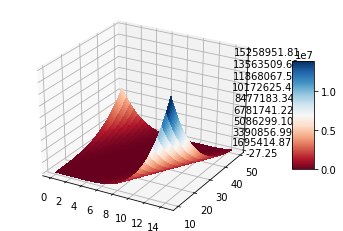

In [58]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# plot the function
x = np.arange(0,15,0.5)
y = np.arange(10,50,0.5)
X,Y = meshgrid(x, y) # grid of point
Z = f([X,Y]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("graph.png")
plt.show()


## Exact Line Search

In [3]:
def BisectionMethod(f, a=-100,b=100,epsilon=0.005) :
    iteration=0
    while (b - a) >= epsilon:
        x_1 = (a + b) / 2
        fx_1 = f(x_1)
        if f(x_1 + epsilon) <= fx_1:
            a = x_1
        else:
            b = x_1
        iteration+=1
    x_star = (a+b)/2
    return x_star

In [4]:
def ExactLineSearch(f, x0, d):
    alpha = Symbol('alpha')
    function_alpha = f(np.array(x0)+alpha*np.array(d))
    f_alp = lambdify(alpha, function_alpha, 'numpy')
    alp_star = BisectionMethod(f_alp)
    return alp_star

## Cyclic Coordinate Search

In [5]:
def np_str(x_k):
    '''
    Used to convert numpy array to string with determined format
    '''
    return np.array2string(x_k, precision=3, separator=',')

In [6]:
def CyclicCoordinateSearch(f, x0, epsilon):
    x0 = np.array(x0)
    x_array = [x0]
    k = 0
    n = len(x0)
    res_array = []
    while(True):
        y0 = np.copy(x_array[k])
        for j in range(n):
            d = np.zeros(n)
            d[j] = 1
            alpha = ExactLineSearch(f, y0, d)
            y1 = y0 + alpha*d
            res_array.append([k, np_str(x_array[k]), f(x_array[k]),j, str(d),np_str(y0), alpha, np_str(y1)])
            y0 = y1
        x_array.append(y1)
        k += 1
        if(np.linalg.norm(x_array[k]-x_array[k-1]) < epsilon):
            res_array.append([k, np_str(x_array[k]), f(x_array[k])])
            result_table = pd.DataFrame(res_array, columns=['k' ,'x^k', 'fx^k', 'j','d^j','y^j','a^j', 'y^j+1'])
            return result_table

**Solution set 1:**
*   x^0 = \[0, 0\]
*   Epsilon = 0.01

In [7]:
output1 = CyclicCoordinateSearch(f,[0,0],0.01)
output1

,k,x^k,fx^k,j,d^j,y^j,a^j,y^j+1
0,0,"[0,0]",16.000000,0.0,[1. 0.],"[0,0]",0.102234,"[0.102,0. ]"
1,0,"[0,0]",16.000000,1.0,[0. 1.],"[0.102,0. ]",1.301575,"[0.102,1.302]"
2,1,"[0.102,1.302]",13.490901,0.0,[1. 0.],"[0.102,1.302]",0.251770,"[0.354,1.302]"
3,1,"[0.102,1.302]",13.490901,1.0,[0. 1.],"[0.354,1.302]",1.258850,"[0.354,2.56 ]"
4,2,"[0.354,2.56 ]",10.332758,0.0,[1. 0.],"[0.354,2.56 ]",0.245667,"[0.6 ,2.56]"
5,2,"[0.354,2.56 ]",10.332758,1.0,[0. 1.],"[0.6 ,2.56]",1.228333,"[0.6 ,3.789]"
6,3,"[0.6 ,3.789]",7.373379,0.0,[1. 0.],"[0.6 ,3.789]",0.236511,"[0.836,3.789]"
7,3,"[0.6 ,3.789]",7.373379,1.0,[0. 1.],"[0.836,3.789]",1.182556,"[0.836,4.971]"
8,4,"[0.836,4.971]",4.638329,0.0,[1. 0.],"[0.836,4.971]",0.227356,"[1.064,4.971]"
9,4,"[0.836,4.971]",4.638329,1.0,[0. 1.],"[1.064,4.971]",1.136780,"[1.064,6.108]"


**Solution set 2:**
*   x^0 = \[10, 35\]
*   Epsilon = 0.01

In [10]:
output2 = CyclicCoordinateSearch(f,[10,35],0.01)
output2

,k,x^k,fx^k,j,d^j,y^j,a^j,y^j+1
0,0,"[10,35]",50641.000000,0.0,[1. 0.],"[10,35]",-3.166199,"[ 6.834,35. ]"
1,0,"[10,35]",50641.000000,1.0,[0. 1.],"[ 6.834,35. ]",-0.041199,"[ 6.834,34.959]"
2,1,"[ 6.834,34.959]",-27.329070,0.0,[1. 0.],"[ 6.834,34.959]",-0.007629,"[ 6.826,34.959]"
3,1,"[ 6.834,34.959]",-27.329070,1.0,[0. 1.],"[ 6.826,34.959]",-0.038147,"[ 6.826,34.921]"
4,2,"[ 6.826,34.921]",-27.334105,0.0,[1. 0.],"[ 6.826,34.921]",-0.007629,"[ 6.819,34.921]"
5,2,"[ 6.826,34.921]",-27.334105,1.0,[0. 1.],"[ 6.819,34.921]",-0.038147,"[ 6.819,34.883]"
6,3,"[ 6.819,34.883]",-27.339024,0.0,[1. 0.],"[ 6.819,34.883]",-0.007629,"[ 6.811,34.883]"
7,3,"[ 6.819,34.883]",-27.339024,1.0,[0. 1.],"[ 6.811,34.883]",-0.038147,"[ 6.811,34.844]"
8,4,"[ 6.811,34.844]",-27.343826,0.0,[1. 0.],"[ 6.811,34.844]",-0.007629,"[ 6.803,34.844]"
9,4,"[ 6.811,34.844]",-27.343826,1.0,[0. 1.],"[ 6.803,34.844]",-0.038147,"[ 6.803,34.806]"


## Hook & Jeeves Method

In [48]:
def HookJeevesMethod(f, x0, epsilon):
    x0 = np.array(x0)
    x_array = [x0]
    x_temp = []
    k = 0
    n = len(x0)
    res_array = []
    while(True):
        # explorotary moves
        y0 = np.copy(x_array[k])
        for j in range(n):
            d_e = np.zeros(n)
            d_e[j] = 1
            alpha_e = ExactLineSearch(f, y0, d_e)
            y1 = y0 + alpha_e*d_e
            y0 = y1
        x_temp.append(y1)
        # pattern moves
        d_p = x_temp[k] - x_array[k]
        alpha_p = ExactLineSearch(f, x_array[k], d_p)
        y1 = x_array[k] + alpha_p*d_p
        x_array.append(y1)
        res_array.append([k, np_str(x_array[k]), f(x_array[k]), np_str(x_temp[k]), str(d_p), alpha_p, np_str(x_array[k+1])])
        k += 1
        if(np.linalg.norm(x_array[k]-x_array[k-1]) < epsilon):
            res_array.append([k, np_str(x_array[k]), f(x_array[k])])
            result_table = pd.DataFrame(res_array, columns=['k' ,'x^k', 'fx^k', 'x^temp','d^k','a^k', 'x^k+1'])
            return result_table

In [49]:
HJMoutput1 = HookJeevesMethod(f,[0,0],0.01)
HJMoutput1

,k,x^k,fx^k,x^temp,d^k,a^k,x^k+1
0,0,"[0,0]",16.000000,"[0.102,1.302]",[0.10223389 1.30157471],1.225281,"[0.125,1.595]"
1,1,"[0.125,1.595]",13.330021,"[0.411,2.844]",[0.28533936 1.24969482],12.339783,"[ 3.646,17.016]"
2,2,"[ 3.646,17.016]",-13.490703,"[ 3.288,17.231]",[-0.35858154 0.21514893],0.901794,"[ 3.323,17.21 ]"
3,3,"[ 3.323,17.21 ]",-17.221036,"[ 3.324,17.413]",[0.00152588 0.20294189],1.048279,"[ 3.325,17.423]"
4,4,"[ 3.325,17.423]",-17.356754,"[ 3.369,17.635]",[0.04425049 0.21209717],67.143250,"[ 6.296,31.663]"
5,5,"[ 6.296,31.663]",-26.577431,"[ 6.175,31.668]",[-0.12054443 0.00457764],0.971985,"[ 6.178,31.668]"
6,6,"[ 6.178,31.668]",-27.335937,"[ 6.177,31.675]",[-0.00152588 0.00762939],0.627136,"[ 6.178,31.673]"
7,7,"[ 6.178,31.673]",-27.336277,None,None,NaN,None


In [50]:
HJMoutput2 = HookJeevesMethod(f,[10,35],0.01)
HJMoutput2

,k,x^k,fx^k,x^temp,d^k,a^k,x^k+1
0,0,"[10,35]",50641.000000,"[ 6.834,34.959]",[-3.16619873 -0.04119873],0.999451,"[ 6.836,34.959]"
1,1,"[ 6.836,34.959]",-27.327372,"[ 6.828,34.93 ]",[-0.00762939 -0.0289917 ],7.597351,"[ 6.778,34.739]"
2,2,"[ 6.778,34.739]",-27.350633,"[ 6.782,34.703]",[ 0.00457764 -0.03509521],0.880432,"[ 6.782,34.708]"
3,3,"[ 6.782,34.708]",-27.361115,"[ 6.777,34.676]",[-0.00457764 -0.03204346],4.585266,"[ 6.761,34.561]"
4,4,"[ 6.761,34.561]",-27.367863,"[ 6.747,34.526]",[-0.01373291 -0.03509521],1.808167,"[ 6.736,34.497]"
5,5,"[ 6.736,34.497]",-27.382612,"[ 6.734,34.462]",[-0.00152588 -0.03509521],1.020813,"[ 6.734,34.461]"
6,6,"[ 6.734,34.461]",-27.385644,"[ 6.73 ,34.439]",[-0.00457764 -0.02288818],51.164246,"[ 6.5 ,33.29]"
7,7,"[ 6.5 ,33.29]",-27.440507,"[ 6.495,33.268]",[-0.00457764 -0.02288818],0.001526,"[ 6.5 ,33.29]"
8,8,"[ 6.5 ,33.29]",-27.440507,None,None,NaN,None


## Simplex Search

In [65]:

def compute_f_values(a):
    f_values=np.zeros(a.shape[0])    
    for i in range(a.shape[0]):
        f_values[i]=f(a[i])
    return f_values    

def SimplexSearch(x, epsilon = 0.005, alpha = 1, beta = 0.5, gamma = 2, cond = True, _type = None):
    res = []
    while(cond):    
        sum_value = 0
        f_values = compute_f_values(x)#function values of x_matrix
        x_h = x[np.argmax(f_values)] #the worst point
        x_l = x[np.argmin(f_values)] #the best point
        x_mean = np.mean(np.delete(x, np.argmax(f_values), 0), axis=0) #delete x_h and take the mean
        
        x_r = x_mean + alpha*(x_mean-x_h) #reflection
        
        if f(x_l) > f(x_r): #the reflected point x_r happens to be better than the current best  
            x_e = x_mean + gamma*(x_r-x_mean) #Expansion
            
            if f(x_r) > f(x_e): #the expanded point x_e happens to be better than the current best x_r
                x[np.argmax(f_values)] = x_e
                _type = "E"
                
            else:             #the expanded point is not better than x_r so we replace x_h with x_r
                x[np.argmax(f_values)] = x_r
                _type = "R"
        else:
            if np.max(compute_f_values(np.delete(x, np.argmax(f_values), 0))) >= f(x_r):
                x[np.argmax(f_values)] = x_r
                _type = "R"
            else:
                _type = "C"
                if f(x_h) > f(x_r):
                    x_h_prime = x_r
        
                else:
                    x_h_prime = x_h
                x_c = x_mean + beta*(x_h_prime-x_mean) #contraction
                
                if f(x_c) <= f(x_h):
                    x[np.argmax(f_values)] = x_c
                else:
                    for i in range(x.shape[0]):
                        x[i] = x[i] + 0.5*(x_l-x[i]) #shrink operation
        
        for i in range(x.shape[0]):
            sum_value += (f(x[i]) - f(x_mean))**2
        cond = np.sqrt(sum_value) >= epsilon
        res.append([np_str(x_mean), np_str(x_h), np_str(x_l), np_str(x[np.argmax(f_values)]), f(x[np.argmax(f_values)]), _type])
                
    return pd.DataFrame(res, columns=["x_mean", "x_h", "x_l", "x_new", "f(x_new)", "type"])

In [66]:
x = np.zeros(shape=(3,2))
x[0] = np.array([-2,15])#initial
x[1] = np.array([-8,10])#initial
x[2] = np.array([0,0])#initial

simplex_result = SimplexSearch(x.copy())
simplex_result

,x_mean,x_h,x_l,x_new,f(x_new),type
0,"[-1. , 7.5]","[2.5 ,6.25]","[0.,0.]","[2.5 ,6.25]",1528.128906,C
1,"[1.25 ,3.125]","[-0.375, 9.062]","[0.,0.]","[-0.375, 9.062]",14310.215836,C
2,"[1.25 ,3.125]","[0.438,6.094]","[0.,0.]","[0.438,6.094]",235.522050,C
3,"[0.219,3.047]","[1.359,4.648]","[0.,0.]","[1.359,4.648]",25.778359,C
4,"[0.68 ,2.324]","[0.559,4.209]","[0.,0.]","[0.559,4.209]",10.238704,C
5,"[0.279,2.104]","[0.819,3.376]","[0.559,4.209]","[0.819,3.376]",7.729433,C
6,"[0.689,3.793]","[ 2.067,11.378]","[0.819,3.376]","[ 2.067,11.378]",-7.498377,E
7,"[1.443,7.377]","[ 2.328,10.546]","[ 2.067,11.378]","[ 2.328,10.546]",-5.231597,R
8,"[ 2.197,10.962]","[ 4.953,26.133]","[ 2.067,11.378]","[ 4.953,26.133]",-23.097638,E
9,"[ 3.51 ,18.755]","[ 2.919,14.651]","[ 4.953,26.133]","[ 2.919,14.651]",-13.538078,C


In [68]:
x_2 = np.zeros(shape=(3,2))
x_2[0] = np.array([-10,-10])#initial
x_2[1] = np.array([-25,45])#initial
x_2[2] = np.array([20,-1])#initial
simplex_result_2 = SimplexSearch(x_2.copy())
simplex_result_2

,x_mean,x_h,x_l,x_new,f(x_new),type
0,"[ 5. ,-5.5]","[-10. , 19.75]","[-10.,-10.]","[-10. , 19.75]",2.366894e+07,C
1,"[-10. , 4.875]","[5. ,1.938]","[-10.,-10.]","[5. ,1.938]",2.829173e+05,C
2,"[-2.5 ,-4.031]","[ 1.25 ,-15.922]","[5. ,1.938]","[ 1.25 ,-15.922]",2.417084e+05,C
3,"[ 3.125,-6.992]","[-3.438,-8.496]","[ 1.25 ,-15.922]","[-3.438,-8.496]",5.761495e+03,C
4,"[ -1.094,-12.209]","[ -7.188,-26.355]","[-3.438,-8.496]","[ -7.188,-26.355]",8.571987e+03,R
5,"[ -5.312,-17.426]","[ -2.031,-16.674]","[-3.438,-8.496]","[ -2.031,-16.674]",1.864018e+03,C
6,"[ -2.734,-12.585]","[1.719,1.186]","[ -2.031,-16.674]","[1.719,1.186]",3.023403e+03,R
7,"[-0.156,-7.744]","[-1.797,-8.12 ]","[ -2.031,-16.674]","[-1.797,-8.12 ]",4.141754e+01,C
8,"[ -1.914,-12.397]","[ -5.547,-25.979]","[-1.797,-8.12 ]","[ -5.547,-25.979]",1.248515e+02,R
9,"[ -3.672,-17.05 ]","[ -2.852,-16.862]","[-1.797,-8.12 ]","[ -2.852,-16.862]",1.123895e+02,C


In [ ]:
print(simplex_result_2.to_latex(index=True,float_format='%.3f'))